In [101]:
# Basic imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv 
import os
import time
import datetime
import random
import torch
from torch import nn, optim
from torch.functional import F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torch.autograd import Variable
from PIL import Image

# Descripció de dades

In [102]:
labels = pd.read_csv("labels.csv")
labels
len(labels['breed'].unique())

120

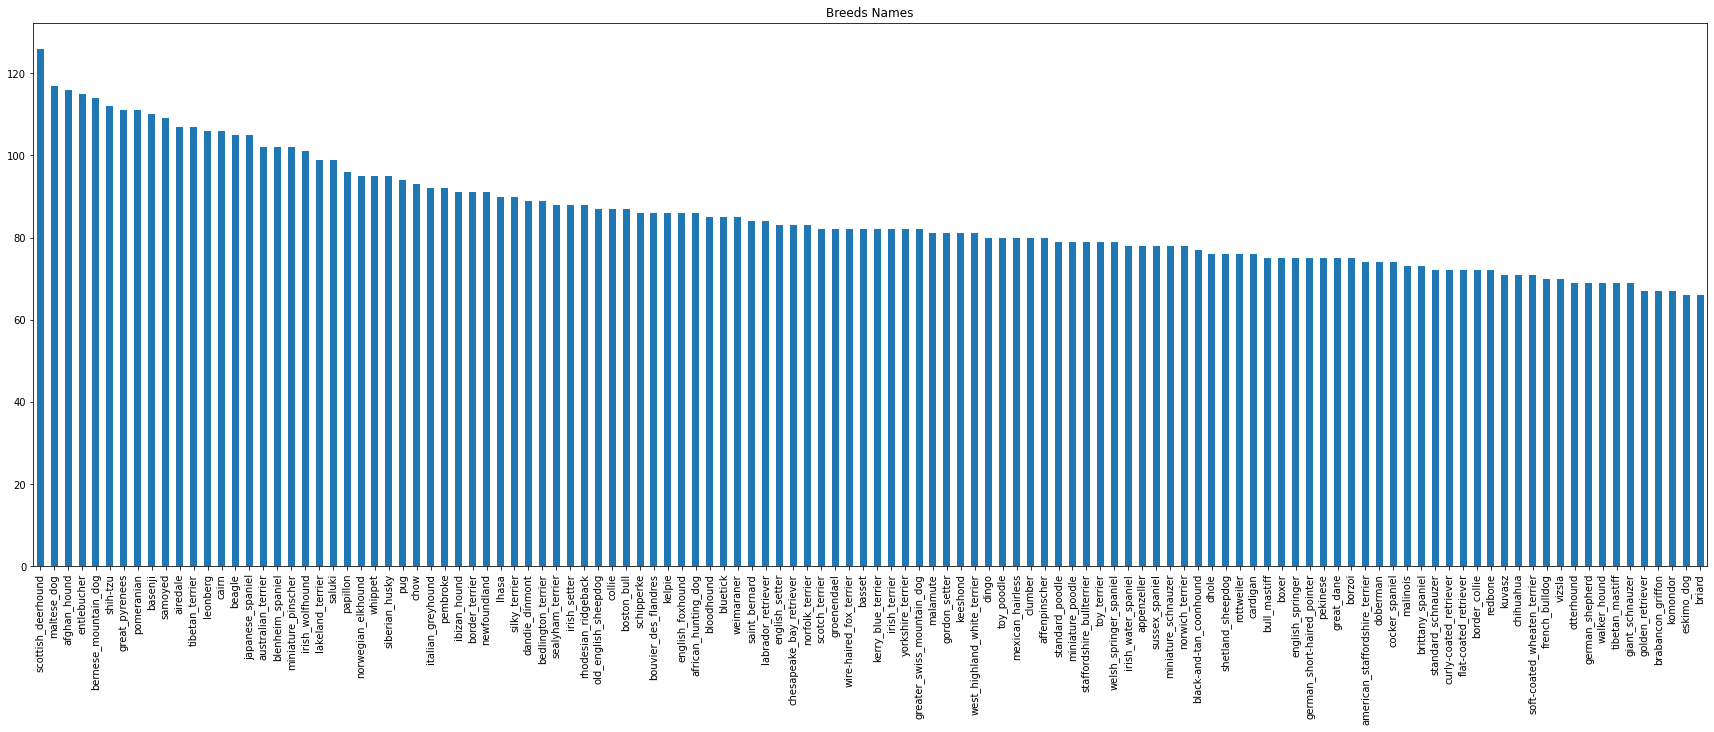

In [103]:
labels.breed.value_counts().plot(kind='bar',figsize=(30,10),title='Breeds Names');

In [104]:
SEED = 123

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [105]:
#Fem un label encoder per tenir les raçes en funció de un nombre
labels2 = labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels2['num'] = le.fit_transform(labels2.breed)
labels2.head()

,id,breed,num
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,19
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,37
2,001cdf01b096e06d78e9e5112d419397,pekinese,85
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,15
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,49


In [106]:
df = labels2[['breed', 'num']]
df.head()

,breed,num
0,boston_bull,19
1,dingo,37
2,pekinese,85
3,bluetick,15
4,golden_retriever,49


In [134]:
#Guardem els valors que correspoenen al label
taula = df.drop_duplicates(subset = "breed")
taula

,breed,num
0,boston_bull,19
1,dingo,37
2,pekinese,85
3,bluetick,15
4,golden_retriever,49
...,...,...
441,bouvier_des_flandres,20
443,tibetan_mastiff,108
466,english_springer,41
478,cocker_spaniel,32


## Mirem com són les imatges

In [135]:
X = labels.id
y = labels.num

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.4, random_state=SEED, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=SEED, stratify=y_valid)

In [136]:
class Dataset_Interpreter(Dataset):
    def __init__(self, data_path, file_names, labels=None, transforms=None):
        self.data_path = data_path
        self.file_names = file_names
        self.labels = labels
        self.transforms = transforms
        
    def __len__(self):
        return (len(self.file_names))
    
    def __getitem__(self, idx):
        img_name = f'{self.file_names.iloc[idx]}.jpg'
        full_address = os.path.join(self.data_path, img_name)
        image = Image.open(full_address)
        label = self.labels.iloc[idx]
        
        if self.transforms is not None:
            image = self.transforms(image)
            
        return np.array(image), label

In [137]:
def plot_images(images):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(20,10))
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(f'{le.inverse_transform([images[i][1]])}')
        ax.imshow(np.array(images[i][0]))
        ax.axis('off')

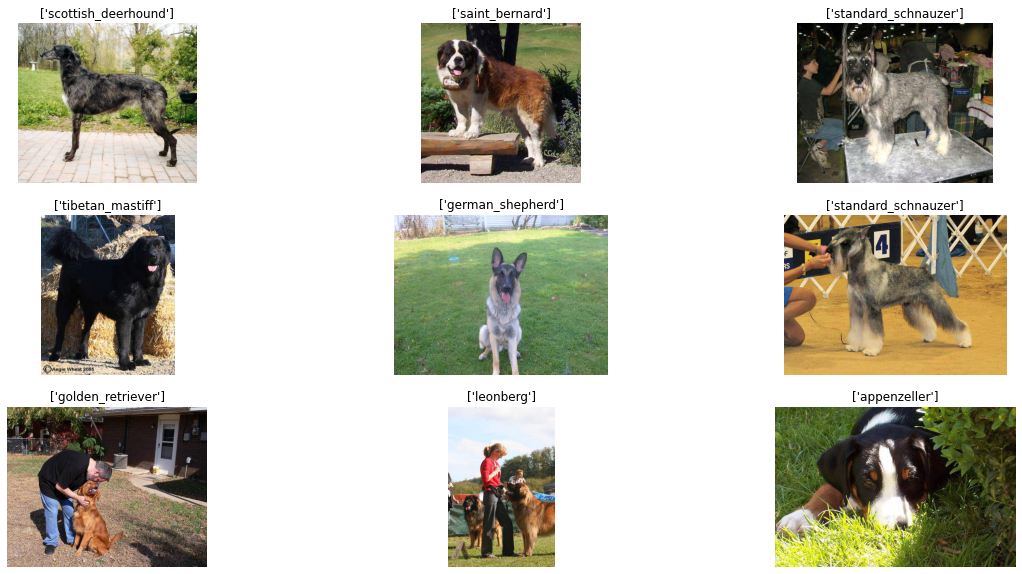

In [138]:
N_IMAGES = 9
X = labels.id
y = labels.breed

train_data = Dataset_Interpreter(data_path='train/', file_names=X_train, labels=y_train)
images = [(image, label) for image, label in [train_data[i] for i in range(N_IMAGES)]] 
plot_images(images)